Вычисляются степени посредничества всех рёбер.

Ребро с наибольшей степенью посредничества удаляется.

Степени посредничества всех затронутых рёбер вычисляются заново.

Шаги 2 и 3 повторяются до тех пор, пока остаются рёбра


[]


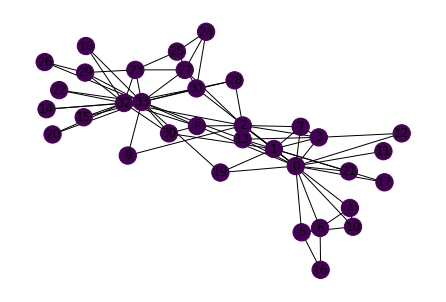

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
import numpy as np

G = nx.karate_club_graph() # импорт графа

communities = girvan_newman(G) # разбиение на группы


# next(communities)  # вот сюда можно дописать еще сколько надо next(communities)

node_groups = list() # создаем список, в котором будут наши вершины
# for com in next(communities):
  # node_groups.append(list(com))

print(node_groups)

node_color = np.zeros(len(G))

for group, nodes in enumerate(node_groups):
  node_color[list(nodes)] = group

nx.draw(G, node_color=node_color, with_labels=True)
plt.show()

In [4]:
comp = girvan_newman(G)
tuple(sorted(c) for c in next(comp))

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [6]:
import networkx.algorithms.community as com
import itertools

k = 10
comp = girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities),com.modularity(G,communities))

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]) 0.3476602762317048
([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [9]) 0.3423192968647514
([0, 1, 3, 7, 11, 12, 13, 17, 19, 21], [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [4, 5, 6, 10, 16], [9]) 0.3580611307884035
([0, 1, 3, 7, 11, 12, 13, 17, 19, 21], [2, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16], [8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33], [9]) 0.3849721706864564
([0, 1, 3, 7, 12, 13, 17, 19, 21], [2, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16], [8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33], [9], [11]) 0.37578006409175235
([0, 1, 3, 7, 12, 13, 17, 19, 21], [2, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16], [8, 14, 15, 18, 20, 22, 23, 29, 30, 32, 33], [9], [11], [26]) 0.3594760218136841
([0, 1, 3, 7, 13, 17, 19, 21], [2, 24, 25, 27, 28, 31], [4, 5, 6, 10,

In [42]:
k = 33
p = []
comp = girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    p_com=com.modularity(G,communities)
    p.append(p_com)
    

Text(0.5, 1.0, 'Динамика модулярности')

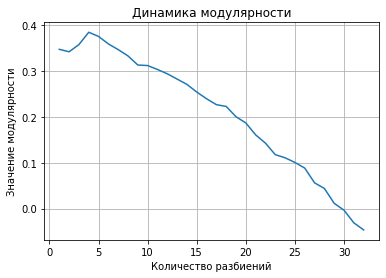

In [45]:
fig, ax = plt.subplots()

ax.plot([i for i in range(1,33)],p)   
ax.set_xlabel('Количество разбиений')
ax.set_ylabel('Значение модулярности')
ax.grid()
plt.title("Динамика модулярности")

# Жадный алгоритм


In [15]:
len(G.nodes())

34

In [38]:
from networkx.algorithms.community import greedy_modularity_communities
modularities = []
for i in range(1,33):
    greedy_module_comms = greedy_modularity_communities(G,cutoff=i, best_n=i)
    modularities.append(nx.algorithms.community.modularity(G, greedy_module_comms))
print(modularities)

[0.0, 0.3998332115215232, 0.41096493693896297, 0.40671089372388075, 0.396028934989974, 0.3873334457750042, 0.3575645134086693, 0.3554281216618879, 0.3470980678772887, 0.3372032008395645, 0.32202357527032854, 0.3157268417008677, 0.2674893648919623, 0.25282509698094113, 0.2343284421206498, 0.22402128895635376, 0.21359232398193426, 0.20613369314668004, 0.19012949532430043, 0.17889469837521774, 0.17549333783100005, 0.17197953561589913, 0.1596671726541855, 0.12483836509810521, 0.11709863008564293, 0.09318603474447627, 0.07606679035250462, 0.06729634002361275, 0.05071119356833641, 0.022300931391840473, 0.006277993290980307, -0.0067090196960326795]


In [49]:
# поиск разбиения с максимальной модулярностью
def max2(z):
    s = 0
    b = 0
    for x in range(len(z)):
        if z[x] > s:
            s = z[x]
            b = x
    return {'index':b, 'max':s}

index = max2(modularities)['index']
M1 = max2(modularities)['max'] # значение модулярности для лучшего разбиение

разбиение(количество сообществ) = 3  максимальное значение модулярности = 0.41096493693896297


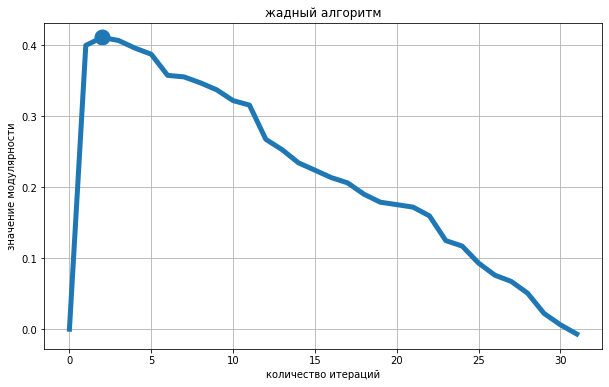

In [50]:

plt.figure(figsize=(10,6))

plt.plot(modularities10,linewidth=5)
plt.scatter(index, M1,linewidths=10)


plt.xlabel('количество итераций')
plt.ylabel('значение модулярности')
plt.title('жадный алгоритм')
plt.grid()
print(f'разбиение(количество сообществ) = {index+1}  максимальное значение модулярности = {M1}')


plt.show()

In [52]:
print(f'лучшее значение модулярности: Жадный алгорим: {M1}')
print(f'лучшее значение модулярности: Алгоритм гирвана Ньюмана: {max(p)}')

лучшее значение модулярности: Жадный алгорим: 0.41096493693896297
лучшее значение модулярности: Алгоритм гирвана Ньюмана: 0.3849721706864564


In [ ]:
import networkx as nx
import collections
import networkx.algorithms.community as com

Модулярность равна доле рёбер от общего числа рёбер, которые попадают в данные группы минус ожидаемая доля рёбер, которые попали бы в те же группы, если бы они были распределены случайно.

In [ ]:
!pip install python-louvain

In [ ]:
import community

In [ ]:
import community.community_louvain as community_louvain

Алгоритм Лувенского: 1.Рассматривает каждый узел в качестве кластера, то есть начинает с числа кластеров, равного числу узлов. 2.Меняет кластерное членство узла, если это приводит к улучшению модулярности. Если модулярность больше нельзя улучшить, узел остается на месте. Это повторяется для каждого узла до тех пор, пока изменения кластерного членства не будут исчерпаны. 3.Строит грубую версию сети, в которой каждый кластер, найденный на шаге 2, представлен отдельным узлом, и объединяет бывшие межкластерные соединения в утолщенные ребра этих новых узлов в соответствии с их весом. 4.Повторяет стадии 1 и 2 до тех пор, пока не закончатся дальнейшие изменения членства и размера связей.



In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
# Импортируем граф
G = nx.karate_club_graph() 

# делаем лучшее разбиение, с максимальной модулярностью
partition = community_louvain.best_partition(G,partition=None, weight='weight', resolution=1.0, randomize=None, random_state=None)

# каждой вершине присваивается координата
pos = nx.spring_layout(G)

# выбираем метод окрашивания для графа
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
cmap

In [ ]:
 # каждая вершина попадает в определенную группу
print(partition) 

In [ ]:
# кортеж из вершин и групп, в которую попала каждая вершина
partition.items() 

In [ ]:
 # группы, в которые попали наши вершины по порядку
print(list(partition.values())) 

In [ ]:
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=400,
                       cmap=cmap, node_color=list(partition.values())) 
# изображение
nx.draw_networkx_edges(G, pos, alpha=1) 

plt.show()

In [ ]:
#partition 
# создаем пустой словарь
cc = dict() 
for node, community in partition.items():
        if community in cc:
            cc[community].add(node) 
        else:
            cc[community] = {node} # в каждом группе перечисляем все вершины, которые туда попали

cc

In [ ]:
list(cc.values())

In [ ]:
a = com.modularity(G, list(cc.values())) # считаем модулярность, она положительна, значит все окей

a